# Analyzing Factbook CIA data with SQL and Python

**Main goal is to combine SQL and Python in order to understand how to extract and analyze data from a db**

## Resources used

**Anaconda distribution** - *Jupyter Notebook v 5.7.8*, *Python 3.7.3*


In [4]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("factbook.db")

pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table'", conn)


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [9]:
pd.read_sql_query("select * from facts limit 5",conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# ok so still, we combine sql with pandas.... not clear

In [10]:
query = "select min(population) min_population, max(population) max_population, min(population_growth) min_population_growth, max(population_growth) max_population_growth from facts"

pd.read_sql_query(query, conn)

,min_population,max_population,min_population_growth,max_population_growth
0,0,7256490011,0.0,4.02


 ups, we have some weird values, let's zoom in'

In [11]:
query = "select name from facts where population = 0"
pd.read_sql_query(query, conn)


,name
0,Antarctica


In [12]:
query = "select name from facts where population = 7256490011"
pd.read_sql_query(query,conn)

,name
0,World


This two aren't even countries ....DUH

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236F11D2DA0>,
      dtype=object)

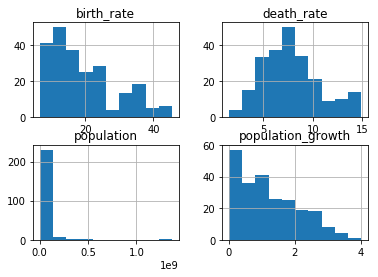

In [6]:
query = "select population, population_growth,birth_rate,death_rate from facts where name not in ('Antarctica','World')"

pd.read_sql_query(query, conn).hist()

